<a href="https://colab.research.google.com/github/CarolineAndradeR/Data-Science/blob/main/S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conceitos**

Na área de estudos de séries temporais observar o passado é funamental para verificação de tendências e projeções de metas.

Cinco aplicações para séries temporais:
*   Projeção de valores futuros de uma série
*   Definição da sequência de entradas e saídas de sistemas dinâmicos.
*   Realizar análise de interveções, como políticas públicas ou política de preços.
*   Verifiar a correlação dinâmica entre diversas variáveis no tempo.
*   Analisar controles de sistemas e potencial de desvios.

Uma série temporal é uma sequeência de observações ordenadas no tempo.

Graficamente, uma série temporal é representada com o eixo x, o tempo e o eixo y, a medida observada. Considerabdo o contexto de modelo de regressão linear, bastaríamos ajustar uma reta em que a variável dependente seria a medida observada e a variável independente, o tempo.

O modelo clássico de regressão é insuficiente para explicar toda a dinâmica existente em uma série temporal já que não captura estrutura relacionadas com o tempo. Uma dessas dinâmicas é o fenômeno da possível correlação existente entre os dias passado, possibilitando estimar um dos modelos mais conhecidos o ARIMA.

**ARIMA**
Se tornou bastante utilizado devido á sua simplicidade de estimação, a captura dessas três estruturas possibilta um melhor ajuste da série e, consequentemente, a capacidade de previsão.

AR - Autoregressive
I - Intefrated
MA - Moving Average

Para ajustar um modelo ARIMA são necessários seis passos:
* Plotar os dados.
* Verificar a necessidade de transforma os dados (verificar estacionariedade).
* Identficar as ordens de dependência.
* Estimar os parâmetros.
* Diagnostcar a qualidade do modelo.

**Conceito de Estacionalidade**

Uma série temporal é considerada como um processo estocástico (é uma variável que se comporta, durante o tempo, de uma Maneira onde pelo menos parte e considerada randômica)

A primeira restrição remetente ao termo "estacionalidade", se refere ao equilibrio estatístico, visto é, apesar de os valores da série variarem no tempo, as propraridades probalísticas não mudam no tempo.

Séries estacionárias possuem media e variância constantes.


Caso uma série temporal não seja estacionária, podemos realizar transformações para obter a estacionaridade,u,, assim possibilitar na estimação dos parametros e previsão das observações futuras.|

Podemao definir no modelo ARIMA, nesse mitodo, a série ajustada para manter ou estacioraridade, conforme a ordem de integração, e cos parâmetros são ajustados de acordo com as ordens autorregressivas e as ordens de médias moveis.

Também podemos dividir a amostra de análise para treino u teste.  A diferença para os casos é que a divisão é mediada por uma relata v de referência.

Por exemplo,care tenhamos uma série de vendas no período entre 01/01/2000  e 0 1/01/2010, podemos definir uma data de referência como 01/01/2009. Dessa  forma, a amostra de treinamento poderá compreender  o período entre 01/01/2000 e 31/12/2008, e a amostra de teste, período entre 01/01/2009 e 01/01/2010.

No caso de séries temporais, as métricas de avaliação na  amostra de testes são MAE (mean absolute error), MAPE ( mean absolute percentage erros )  e  RMSE ' root mean squared erros ).

# **Prática**

In [2]:
# gerais
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# series temporais
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

# carregar dados
dados_eventos = pd.read_csv('/content/drive/MyDrive/Asset_FIAP/dados_vendas_evento.csv')

In [3]:
# dados gastos
dados_eventos.head()

,data_venda,data_evento,qtd_inscricoes,ticket
0,2017-02-10,2017-09-13,7,1960.357143
1,2017-03-23,2017-09-13,4,1621.750000
2,2017-03-27,2017-09-13,11,1533.583333
3,2017-04-10,2017-09-13,6,2079.166667
4,2017-04-11,2017-09-13,4,1871.250000


In [4]:
# Identificando os tipos de dados
dados_eventos.dtypes

data_venda         object
data_evento        object
qtd_inscricoes      int64
ticket            float64
dtype: object

In [5]:
# Alterando o tipo da coluna data
dados_eventos['data_venda'] = pd.to_datetime(dados_eventos['data_venda'])
# tipos
dados_eventos.dtypes

data_venda        datetime64[ns]
data_evento               object
qtd_inscricoes             int64
ticket                   float64
dtype: object

In [6]:
# Seperação velas variáveis de data e a variável que vai ser utilizada para previsão
dados_analises = dados_eventos[['data_venda', 'qtd_inscricoes']]
# Ajuste da coluna data para índice
dados_analises.set_index('data_venda',inplace=True)
dados_analises.head()

,qtd_inscricoes
data_venda,
2017-02-10,7
2017-03-23,4
2017-03-27,11
2017-04-10,6
2017-04-11,4


**APLICAÇÃO DO MODELO ARIMA**


Indentificar a ordem de integração, identificar ordem AR(p), Identificar ordem MA(q), estimar os parâmetros e avaliar o modelo.

<Axes: xlabel='data_venda'>

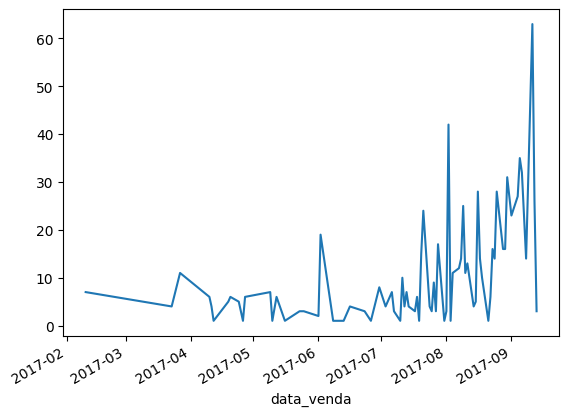

In [7]:
# Identificando a ordem de integração(d)
dados_analises.plot(legend = None)

É visto que a série está com tendência de alta, propriedades relativas a uma série não estacionária.

In [8]:
# teste
teste_adf = adfuller(dados_analises['qtd_inscricoes'])
# valor da estatistica
print('Estatística ADF: {:.4}'.format(teste_adf[0]))
# p-value
print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: 0.9259
p-value: 0.9934


como o valor de p-p-value foi maior que 0,05, não podemos crejeitar a hipótese nula, a série analisada não é estacionária.

A técnica mais utilizada para ajustar é chamada "primeiras diferenças". Basicamente, podemos subtrair o valor atual pelo valor do dia anterior, bem parecido com tentar obter a taxa de variação diária.

In [9]:
# primeiras diferencas
dados_analises.diff().head()

,qtd_inscricoes
data_venda,
2017-02-10,NaN
2017-03-23,-3.0
2017-03-27,7.0
2017-04-10,-5.0
2017-04-11,-2.0


Estatística ADF: -6.216
p-value: 5.377e-08


<Axes: xlabel='data_venda'>

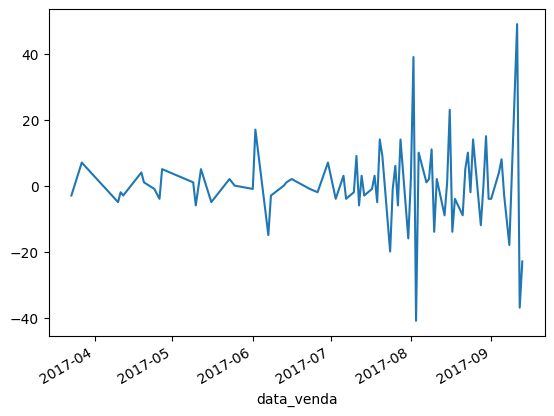

In [10]:
# Tecnica das primeiras diferencas
teste_adf = adfuller(dados_analises['qtd_inscricoes'].diff().dropna())
# valor da estatistica

print('Estatística ADF: {:.4}'.format(teste_adf[0]))
# p value
print('p-value: {:.4}'.format(teste_adf[1]))
# grafico
dados_analises.diff().plot(legend = None)

Um ponto é a possibilidade de realizar esse processos várias vezes até obter a estacionaridade. nesse caso foi necessário apenas 1, a ordem de integração será 1 I(1), caso fosse necessário realizar novamente,  a ordem seria I(2).

Agora o objetivo é indentificar as ordens AR, que ocorre de forma visual pela análise do gráfico de autocorrelação parcial (PACF). Quando os valores altos de correlação parcial existe o indicativo daquele período explica os valores futuros de uma variável.

Caso algum ponto esteja fora da região marcada, será uma ordem para o AR.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


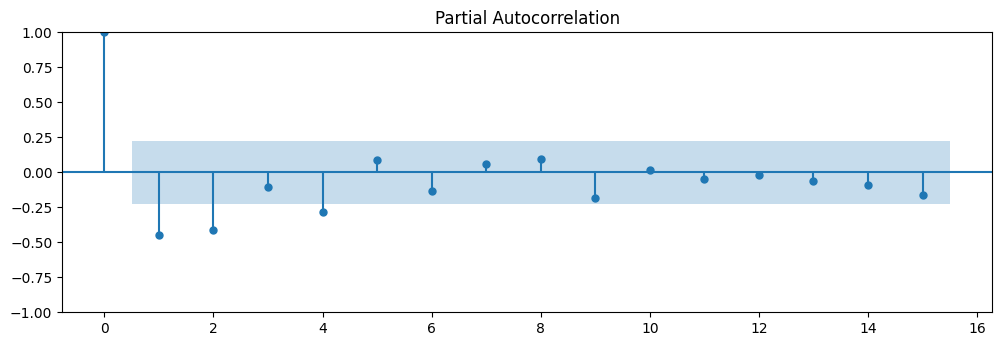

In [11]:
# gráfico pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(dados_analises['qtd_inscricoes'].diff().dropna(), lags=15, ax=ax1)

Definição da orde de médias móveis MA(Q) que é bem parecido com o processo de AR porém utilizamos o gráfico de autocorrelação ACF.

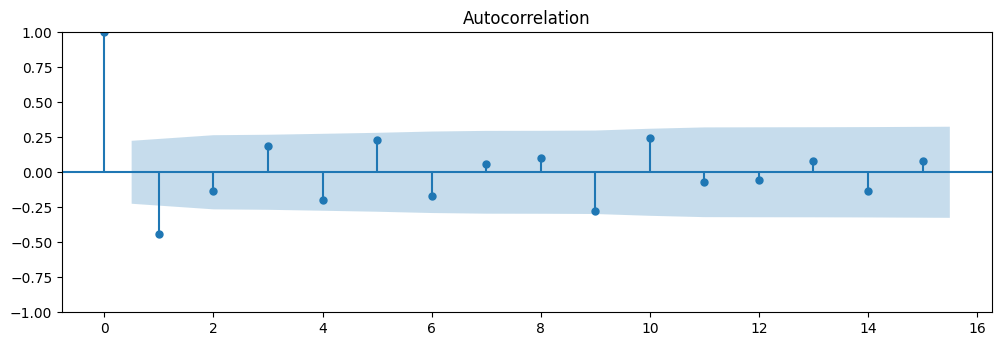

In [12]:
# gráfico acf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(dados_analises['qtd_inscricoes'].diff().dropna(), lags=15, ax=ax1)

**Treinamento do modelo ARIMA**

O primeiro passo é dividir as amostras de treino e teste, porém não pode ser de forma aleatoria, devemos selecionar um passado e buscar prever o futuro.

In [13]:
# separação dos dados, para treinar o algoritmo
# tamanho amostra teste
test_size = 7
# divisão dos dados
dados_treino = dados_analises[:-test_size]
dados_teste = dados_analises[-test_size:]

In [14]:
# Avaliar se é necessário adicionar o componente MA(1) em uma próxima etapa ou não.
# modelo
modelo_4_1_0 = ARIMA(dados_treino['qtd_inscricoes'].values, order=(4, 1, 0), trend = 'n').fit()

# resultados
modelo_4_1_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -232.880
Date:                Sat, 05 Aug 2023   AIC                            475.759
Time:                        00:15:43   BIC                            486.930
Sample:                             0   HQIC                           480.191
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7987      0.107     -7.489      0.000      -1.008      -0.590
ar.L2         -0.7764      0.144     -5.410      0.000      -1.058      -0.495
ar.L3         -0.5104      0.148     -3.454      0.001      -0.800      -0.221
ar.L4         -0.5097      0.144     -3.540      0.000      -0.792      -0.227
sigma2        48.6514      5.788      8.406      0.000      37.307      59.995
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               110.77
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.23   Skew:                             1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Os p-values verificam se as defasagens utilizadas foram significantes, como todos os valores foram menores que 0,05, indica que as ordens AR foram importantes no treinamento do modelo.

Os valores de coeficientes foram todos negativos, isso mostra que as vendas diminuam em um dia e que subirão no proximo, ou se as vendas aumentaram em um dia no próximo dia espera-se uma redução.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


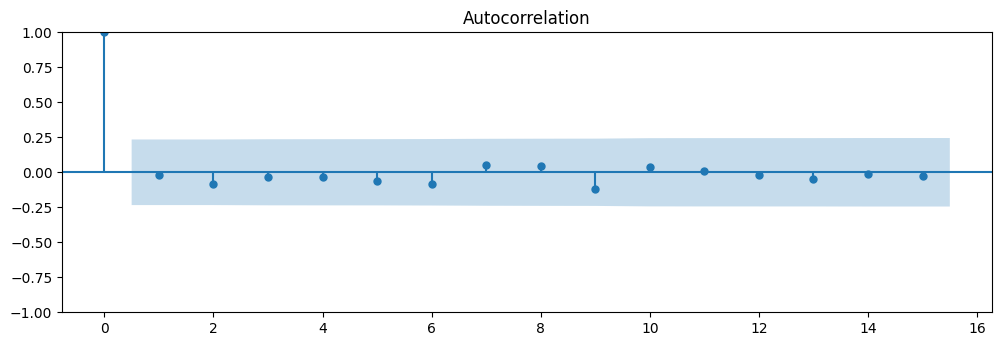

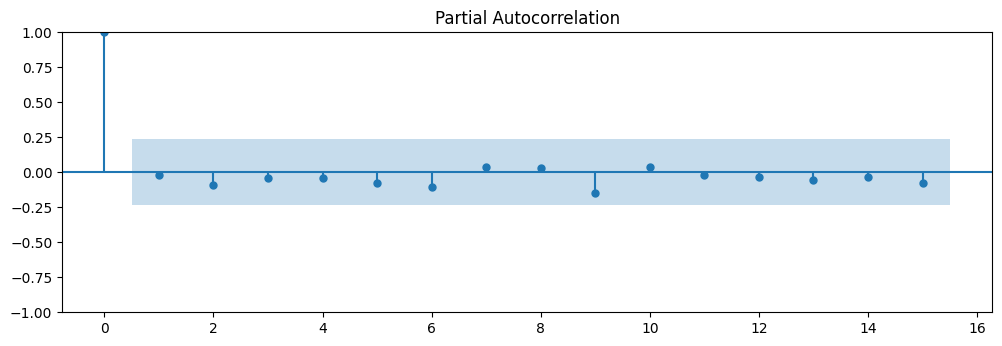

In [15]:
# validar se o modelo ficou bem ajustado
# acf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(modelo_4_1_0.resid, lags=15, ax=ax1)
# pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(modelo_4_1_0.resid, lags=15, ax=ax1)

Nenhum ponto está fora da área marcada, indicando que nenhum outro dado do passado da série é importante para o treinamento do algoritmo, com isso podemos eliminar a ordem MA(1), já que não temos mais erros que possuem correlação com a série estudada.

**Avaliação do Modelo**

In [16]:
# Avaliação na amostra de teste, usando 7 dias do futuro.
# obter previsoes
previsoes_ajustadas = modelo_4_1_0.predict(start = 70, end = 76, dynamic=False)

# adicionar no dataframe
dados_teste['previsoes'] = previsoes_ajustadas
dados_teste

<ipython-input-16-dbdda3db0ae6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_teste['previsoes'] = previsoes_ajustadas


,qtd_inscricoes,previsoes
data_venda,,
2017-09-04,27,21.644574
2017-09-05,35,20.228943
2017-09-06,32,26.492289
2017-09-08,14,25.319557
2017-09-11,63,22.806598
2017-09-12,26,23.248983
2017-09-13,3,22.252923


In [19]:
# separar os dados
dados_reais = dados_teste['qtd_inscricoes'].values
# obter rmse
rmse = np.sqrt(mean_squared_error(dados_reais, previsoes_ajustadas))

# obter mape
mape = mean_absolute_percentage_error(dados_reais, previsoes_ajustadas)

# obter mae
mae = mean_absolute_error(dados_reais, previsoes_ajustadas)
rmse, mape, mae

(18.512870641889556, 1.2517821159281215, 14.164441820087749)

Esse valores sozinhos não traz tanta informação, mas caso um segundo modelo seja aplicado podemos comparar essas decorrências e definir qual algoritmo trouxe o melhor resultado.